#Customer Shopping Trends
---
---


Dataset Glossary (Column-wise)

1.   Customer ID - Unique identifier for each customer
2.   Age - Age of the customer
3.   Gender - Gender of the customer (Male/Female)
4.   Item Purchased - The item purchased by the customer
5.   Category - Category of the item purchased
6.   Purchase Amount (USD) - The amount of the purchase in USD
7.   Location - Location where the purchase was made
8.   Size - Size of the purchased item
9.   Color - Color of the purchased item
10.   Season - Season during which the purchase was made
11.   Review Rating - Rating given by the customer for the purchased item
12.   Subscription Status - Indicates if the customer has a subscription (Yes/No)
13.  Shipping Type - Type of shipping chosen by the customer
14.   Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
15.   Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
16.   Previous Purchases - Number of previous purchases made by the customer
17.   Payment Method - Customer's most preferred payment method
18.   Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
url='https://raw.githubusercontent.com/Another-Curious-Mind/Data-Science/main/shopping_trends_updated.csv'
df = pd.read_csv(url)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 18)

In [ ]:
# Count null values in each column
df.isnull().values.sum()

0

Customer Segmentation:

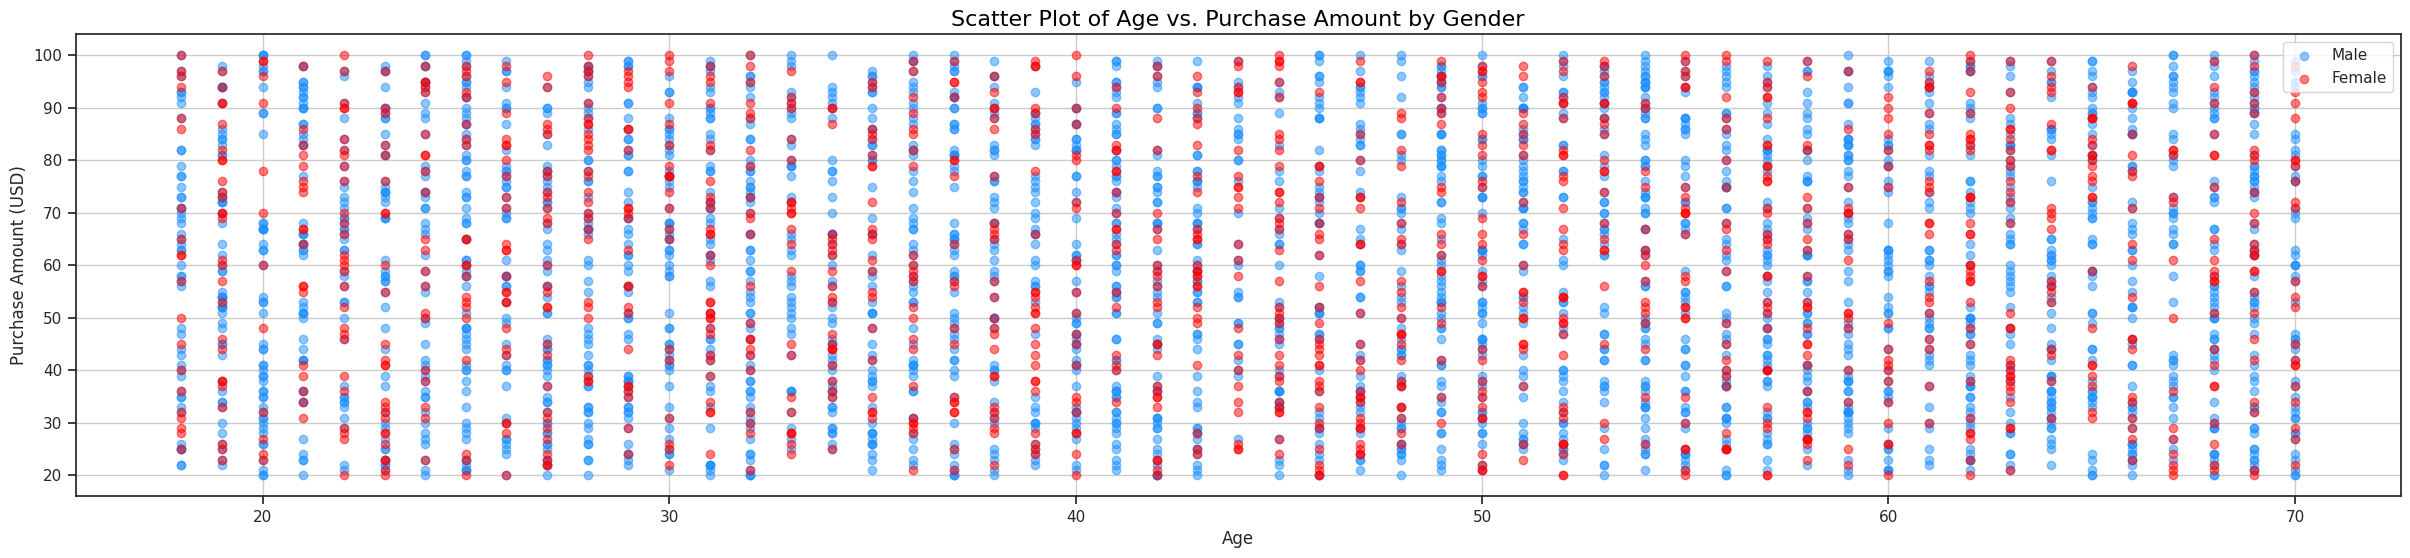

In [ ]:
# Create a scatter plot
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed

# Separate data by gender
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

# Plot male data points
plt.scatter(males['Age'], males['Purchase Amount (USD)'], color='dodgerblue', label='Male', alpha=0.5)

# Apply a seaborn theme
sns.set_style("whitegrid")

# Plot female data points
plt.scatter(females['Age'], females['Purchase Amount (USD)'], color='red', label='Female', alpha=0.5)

# Customize the plot
plt.title('Scatter Plot of Age vs. Purchase Amount by Gender',fontsize=16,  color='black')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

<ipython-input-22-dc163304b739>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




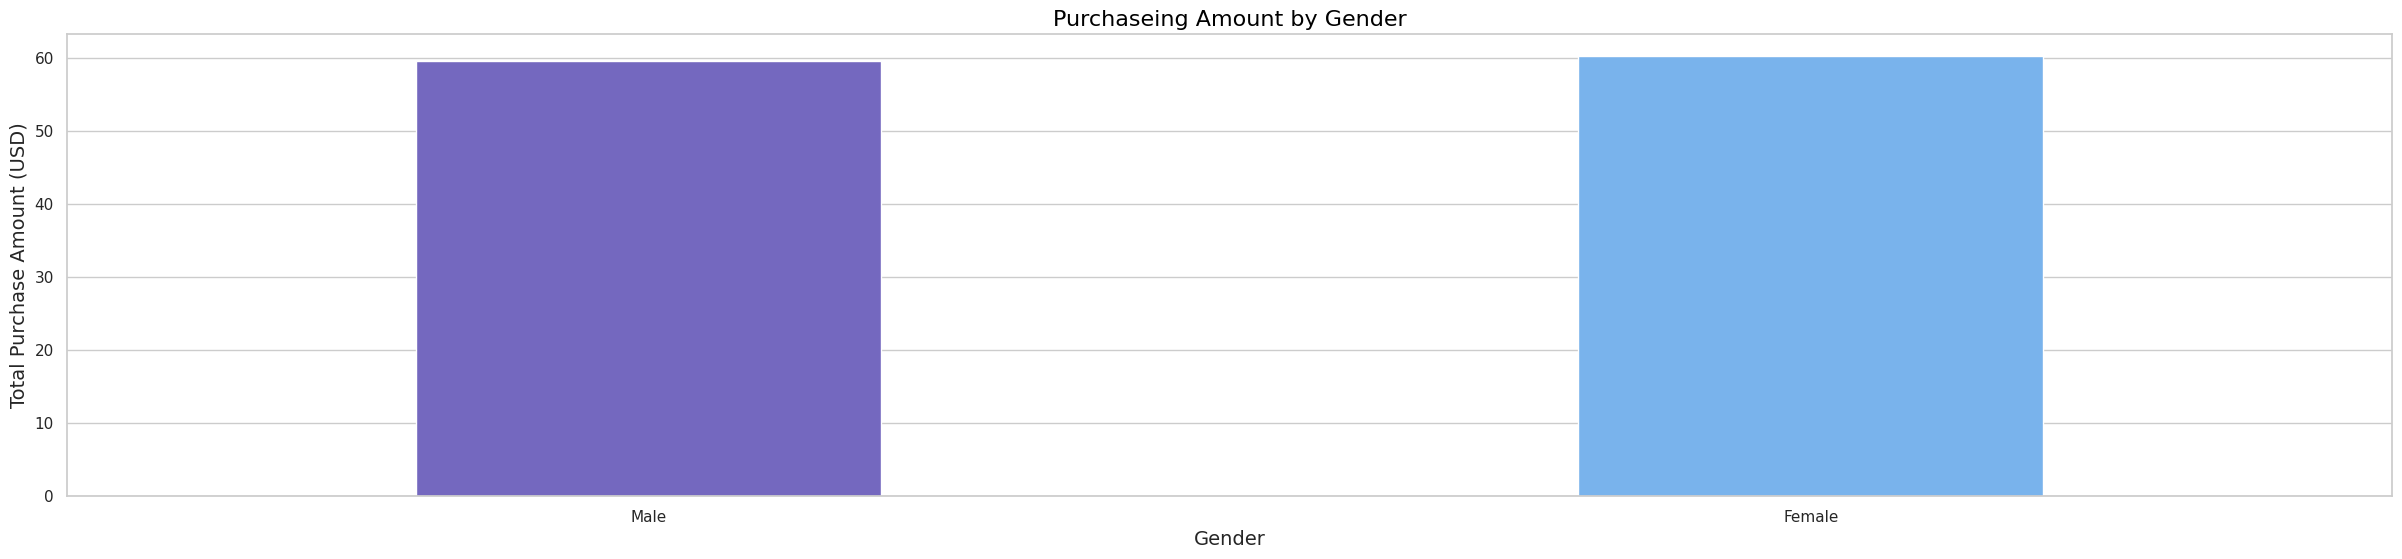

In [ ]:
# Set custom bar colors for each gender
custom_colors = ['#6A5ACD', '#66b3ff']  # Specify a list of colors (one for each bar)

# Set the custom bar width
custom_bar_width = 0.4  # Adjust the width as needed

# Create a bar plot with custom bar colors and width
plt.figure(figsize=(30, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df, palette=custom_colors, ci=None, capsize=0, width=custom_bar_width)

plt.title('Purchaseing Amount by Gender', fontsize=16, color='black')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)

plt.show()


Product Category Analysis:


In [ ]:
fig = px.bar(df, y='Purchase Amount (USD)', x='Item Purchased',color="Category",  hover_name="Item Purchased",
             color_discrete_sequence=["red", "green", "#66b3ff", "goldenrod"], #  "magenta"
            #  category_orders={"continent": ["Oceania", "Europe", "Asia", "Africa", "Americas"]},
             title="Total Shopping Amount by Item and Category"
            )

# Apply a seaborn theme
sns.set_style("whitegrid")

# Update the layout to set the title
fig.update_layout(
    title='Shopping Amount by Item and Category',
    title_x=0.5,
    title_font_family='Nunito',  # Set the title's font family
    title_font=dict(size=25),
    title_font_color='black',
    xaxis_title='Item Purchased',
    yaxis_title=' Purchase Amount (USD)'
)
fig.show()

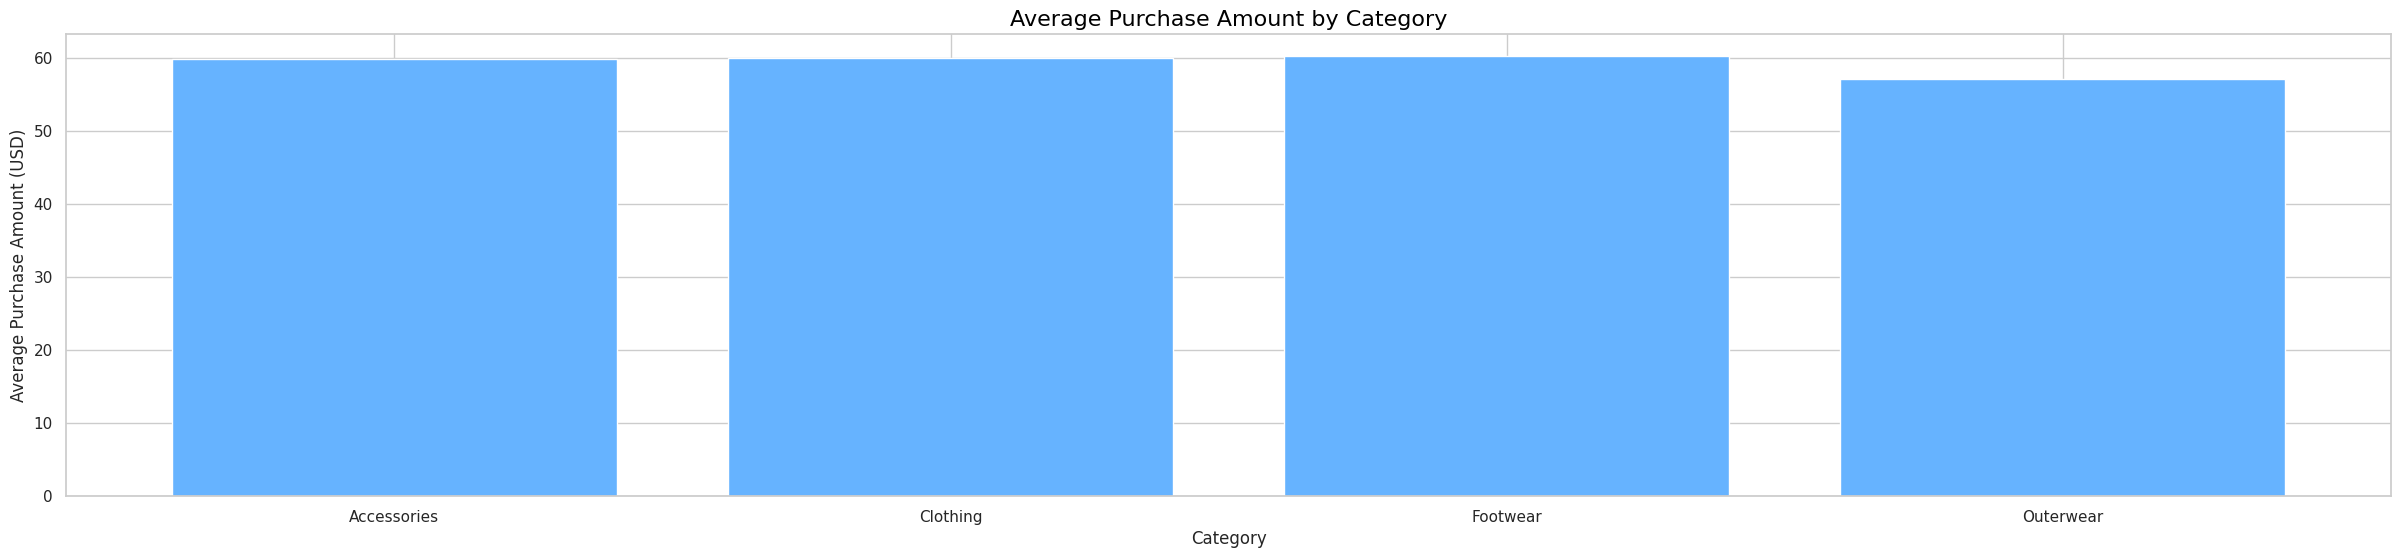

In [ ]:
# Apply a seaborn theme
sns.set_style("whitegrid")# Group the data by 'Category' and calculate the mean purchase amount
category_average = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(30, 6))

# Apply a seaborn theme
sns.set_style("whitegrid")

plt.bar(category_average['Category'], category_average['Purchase Amount (USD)'],color='#66b3ff')
plt.title('Average Purchase Amount by Category',fontsize=16, color='black')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')

plt.show()

Seasonal Shopping Behavior:

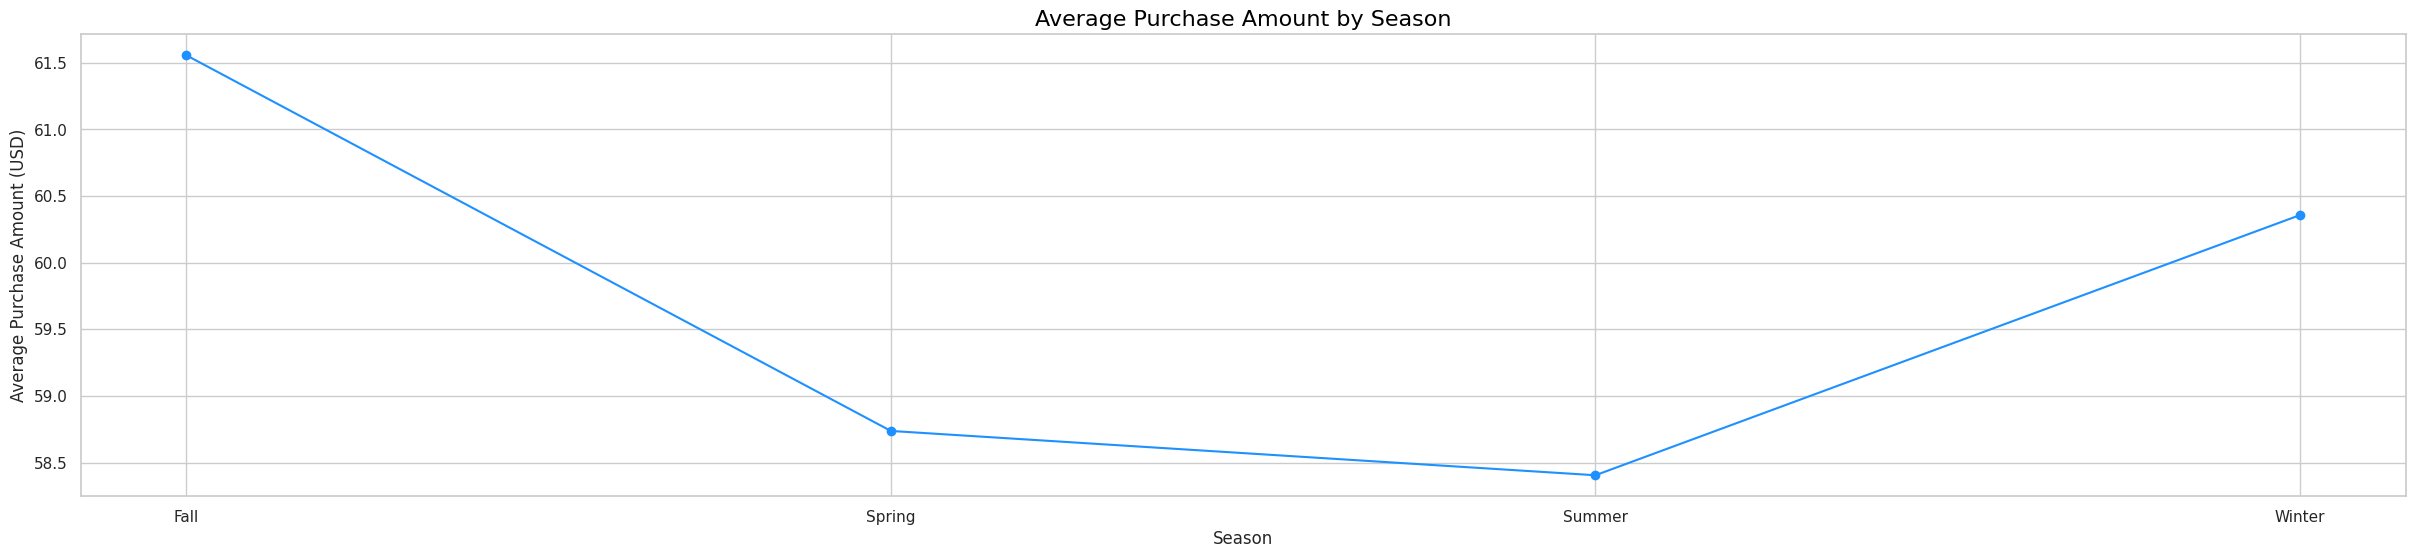

In [ ]:
# Group the data by 'Season' and calculate the average 'Purchase Amount (USD)'
season_avg_purchase = df.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()

# Create a line chart
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed

# Apply a seaborn theme
sns.set_style("whitegrid")

plt.plot(season_avg_purchase['Season'], season_avg_purchase['Purchase Amount (USD)'], marker='o', linestyle='-',color='dodgerblue')
plt.title('Average Purchase Amount by Season',fontsize=16, color='black')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')

plt.grid(True)  # Add grid lines
plt.show()

Customer Loyalty and Purchase Frequency:

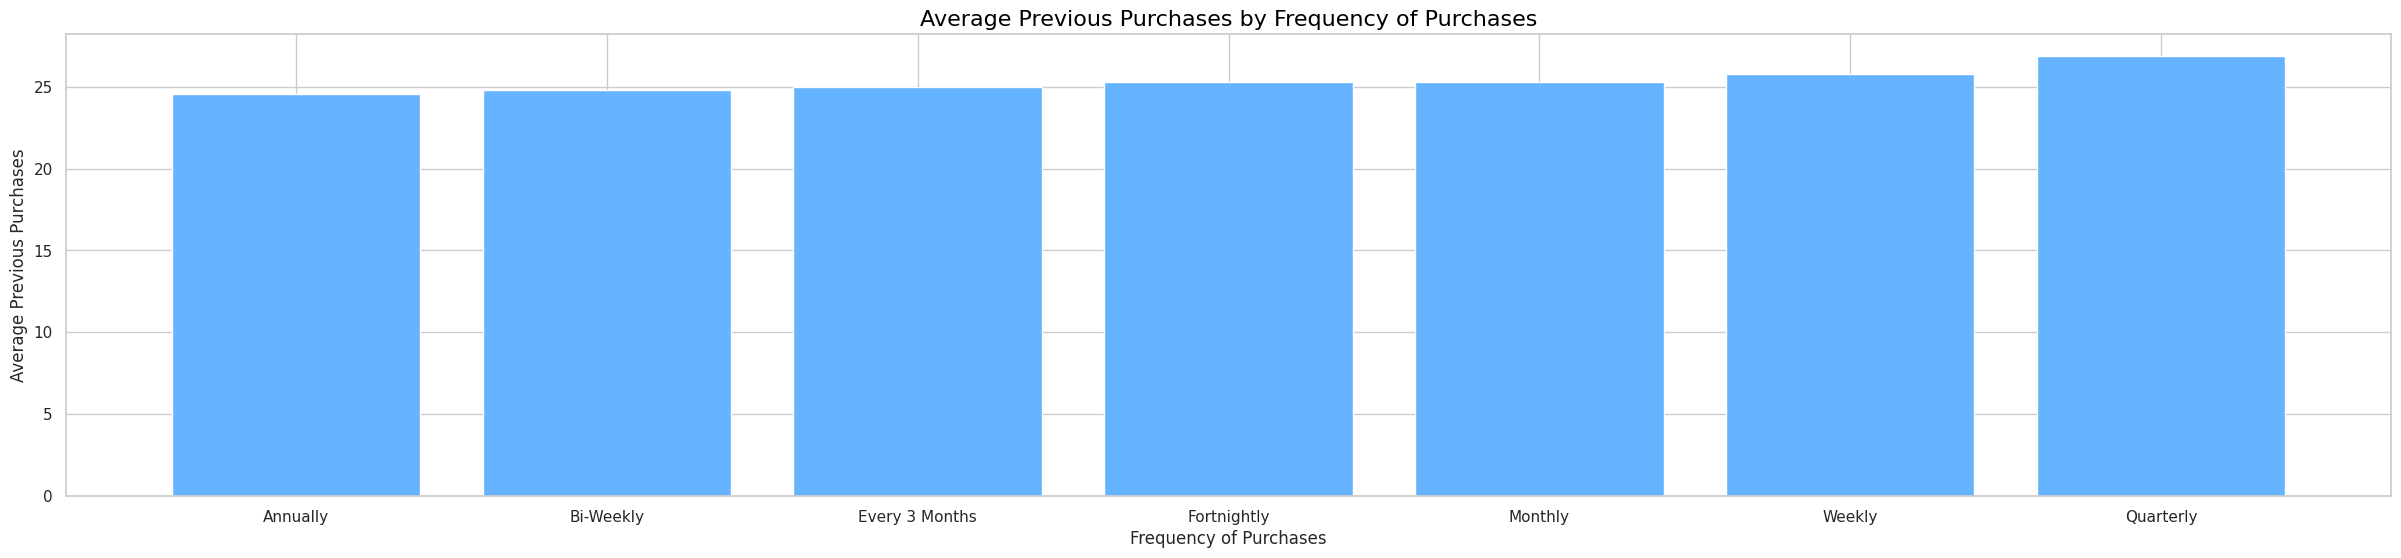

In [ ]:
# Group the data by 'Frequency of Purchases' and calculate the average 'Previous Purchases'
frequency_avg_previous_purchases = df.groupby('Frequency of Purchases')['Previous Purchases'].mean().reset_index()

# Sort the DataFrame by 'Previous Purchases' in descending order
frequency_avg_previous_purchases = frequency_avg_previous_purchases.sort_values(by='Previous Purchases', ascending=True)

# Create a bar chart
plt.figure(figsize=(30, 6))
plt.bar(frequency_avg_previous_purchases['Frequency of Purchases'], frequency_avg_previous_purchases['Previous Purchases'],color='#66b3ff')

# Apply a seaborn theme
sns.set_style("whitegrid")

plt.title('Average Previous Purchases by Frequency of Purchases',fontsize=16, color='black')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Previous Purchases')


# x-axis label rotation
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed


plt.show()

                # there is a slight decline in the average number of previous purchases for customers who purchase from a company annually.
                # This is likely because these customers are less frequent purchasers, and they may therefore be more likely to switch to a different company if they find a better deal or if their needs change.

Effect of Promotions:

<Figure size 3000x600 with 0 Axes>

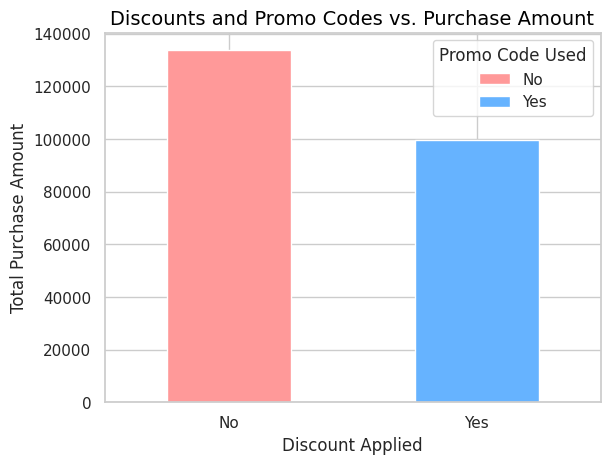

In [ ]:
# Group the data by 'Discount Applied' and 'Promo Code Used' and calculate the sum of 'Purchase Amount'
grouped_data = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].sum().unstack().fillna(0)

colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(30, 6))

# bar chart
ax = grouped_data.plot(kind='bar', stacked=True, color=colors)

# Apply a seaborn theme
sns.set_style("whitegrid")

plt.title('Discounts and Promo Codes vs. Purchase Amount',fontsize=14, color='black')
plt.xlabel('Discount Applied')
plt.ylabel('Total Purchase Amount')

# Customize the legend
plt.legend(title='Promo Code Used', loc='upper right', labels=['No', 'Yes'])

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


Payment Method Analysis:

In [ ]:
# Count the occurrences of each payment method
payment_counts = df['Payment Method'].value_counts()

# Find the most common payment method
most_used_payment_method = payment_counts.idxmax()
most_used_count = payment_counts.max()

print(f"The most commonly used payment method is '{most_used_payment_method}' with {most_used_count} occurrences.")


The most commonly used payment method is 'PayPal' with 677 occurrences.


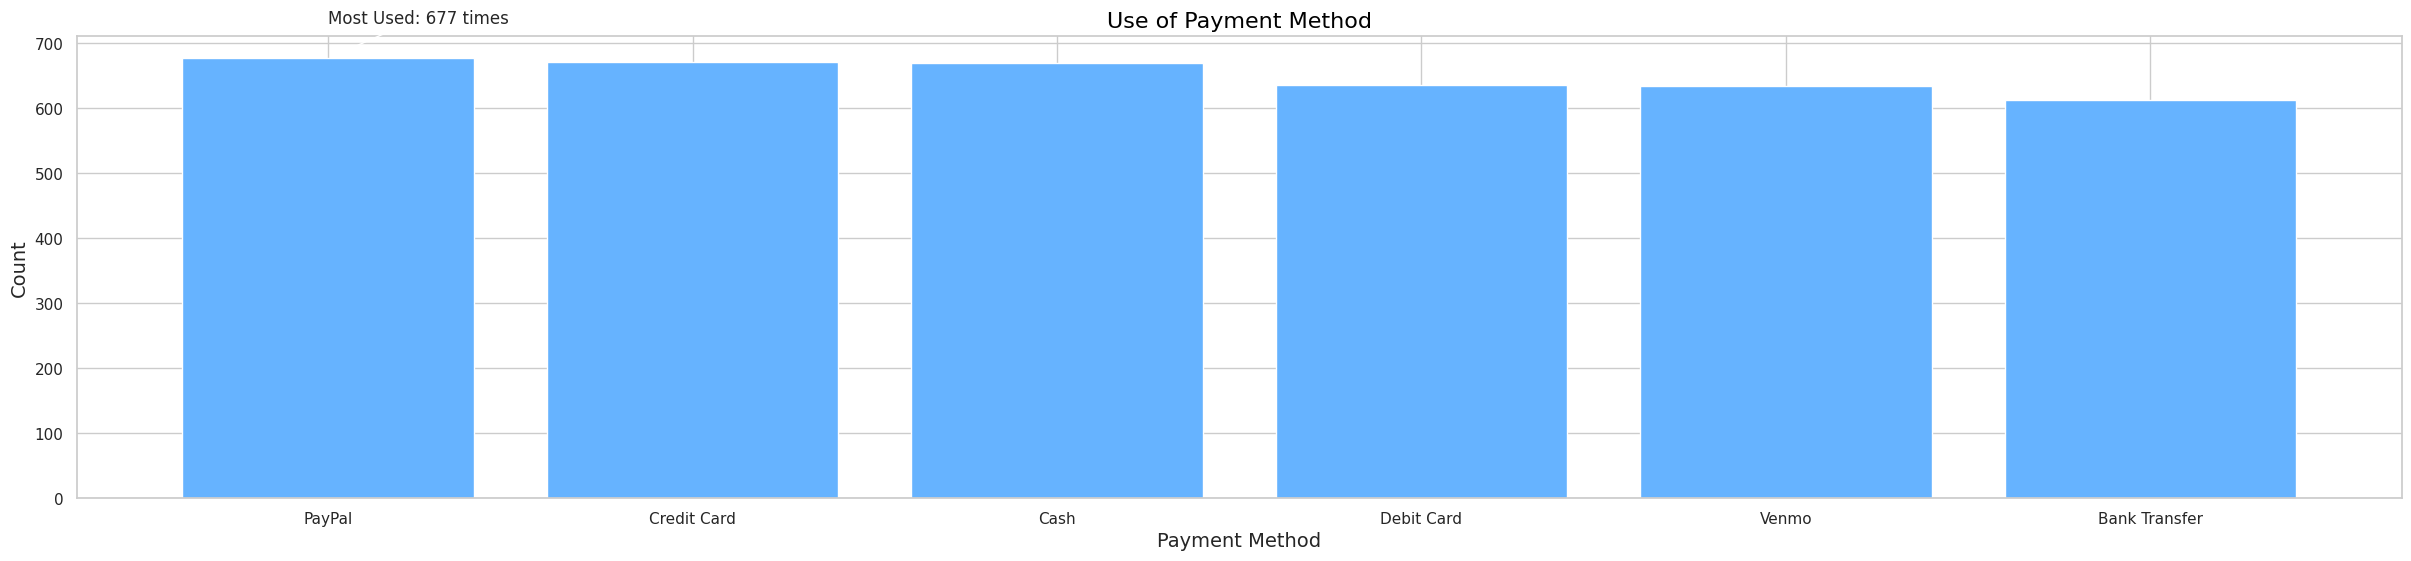

In [ ]:
# Count the occurrences of each payment method
payment_counts = df['Payment Method'].value_counts()

# Find the most common payment method
most_used_payment_method = payment_counts.idxmax()
most_used_count = payment_counts.max()

# Apply a seaborn theme
sns.set_style("whitegrid")

# Create a bar chart
plt.figure(figsize=(30, 6))
fig=plt.bar(payment_counts.index, payment_counts.values, color='#66b3ff')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.title('Use of Payment Method', fontsize=16, color='black')
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.annotate(f'Most Used: {most_used_count} times', xy=(most_used_payment_method, most_used_count), xytext=(0, 25),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))



plt.show()


Customer Feedback and Purchase Amount:

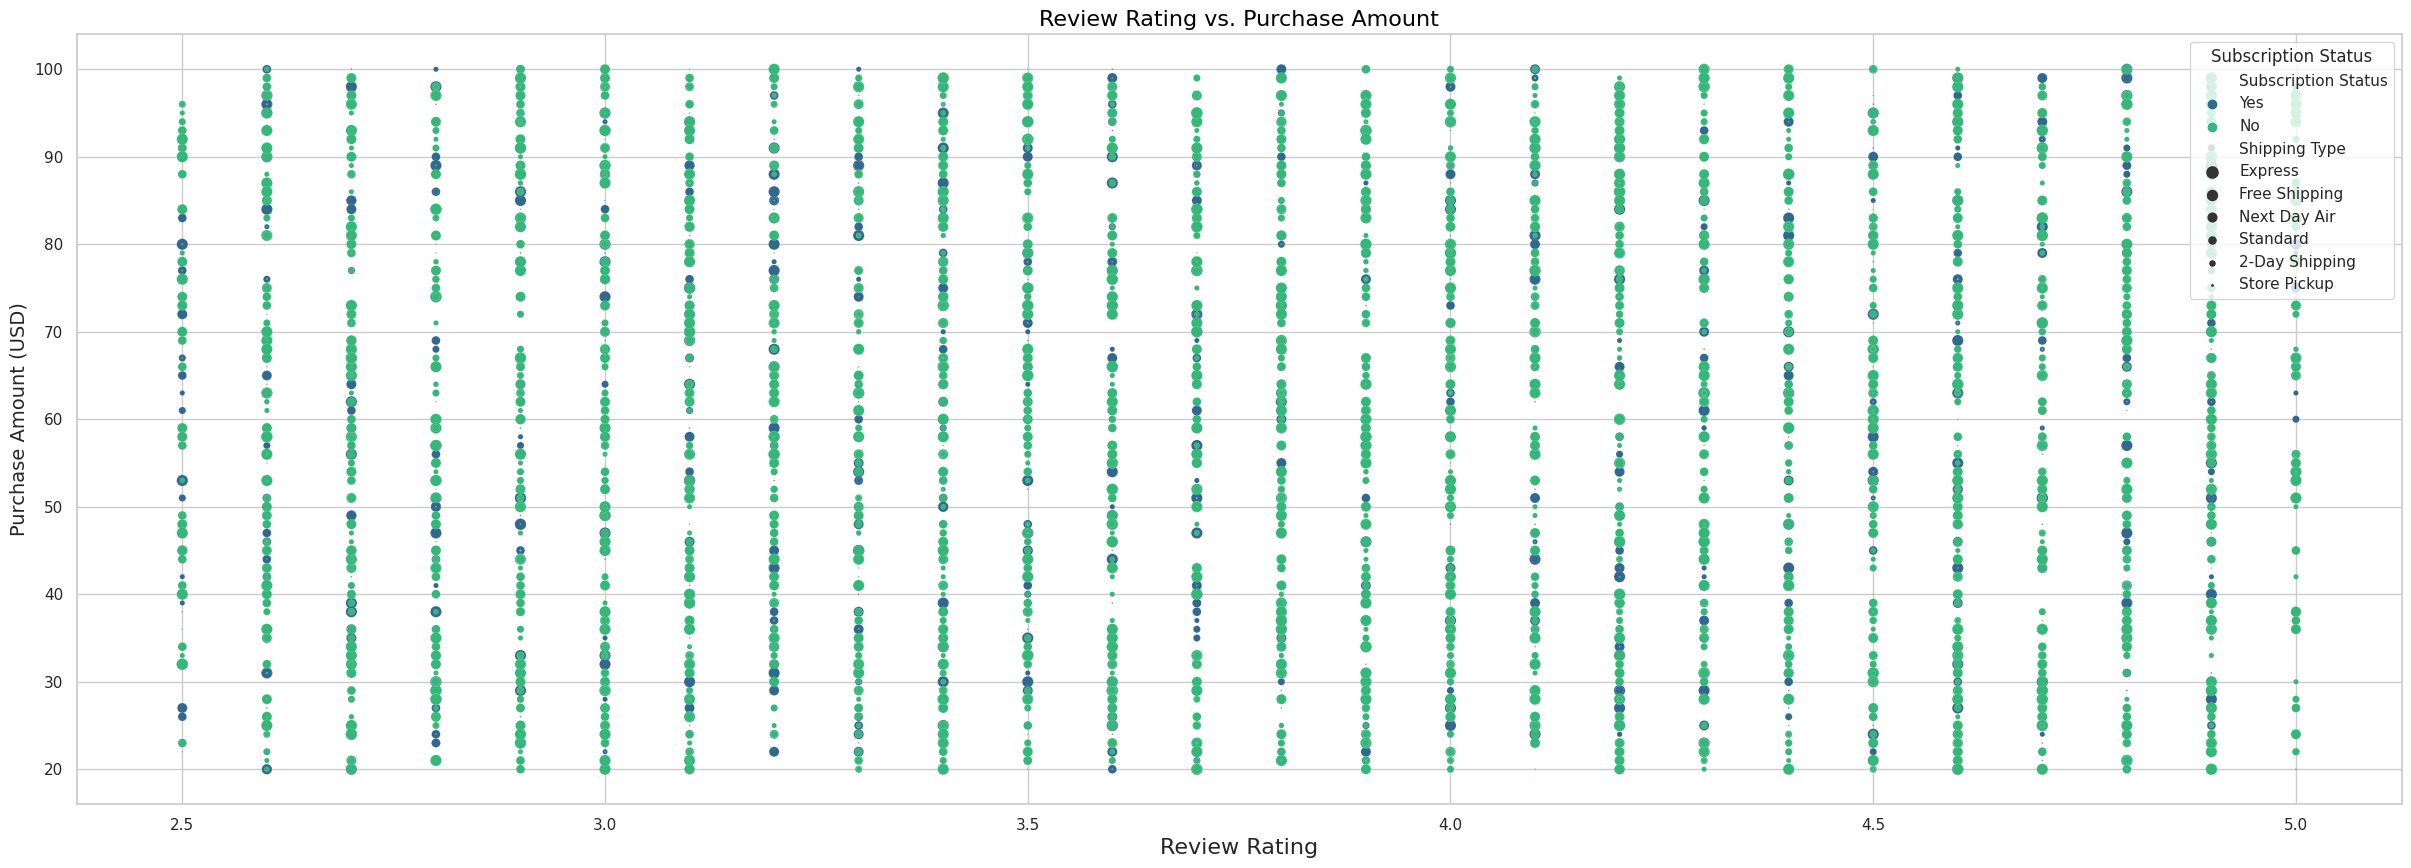

In [ ]:
# Create a scatter plot
plt.figure(figsize=(30, 10))

# Apply a seaborn theme
sns.set_style("whitegrid")

# Specify 'Review Rating' on the x-axis and 'Purchase Amount (USD)' on the y-axis
sns.scatterplot(x='Review Rating', y='Purchase Amount (USD)', data=df, hue='Subscription Status', palette='viridis', size='Shipping Type', sizes=(1, 65))

plt.title('Review Rating vs. Purchase Amount', fontsize=16, color='black')
plt.xlabel('Review Rating', fontsize=16)
plt.ylabel('Purchase Amount (USD)', fontsize=14)

# Customize the legend
plt.legend(title='Subscription Status', loc='upper right')

plt.show()


Item Specific Insights

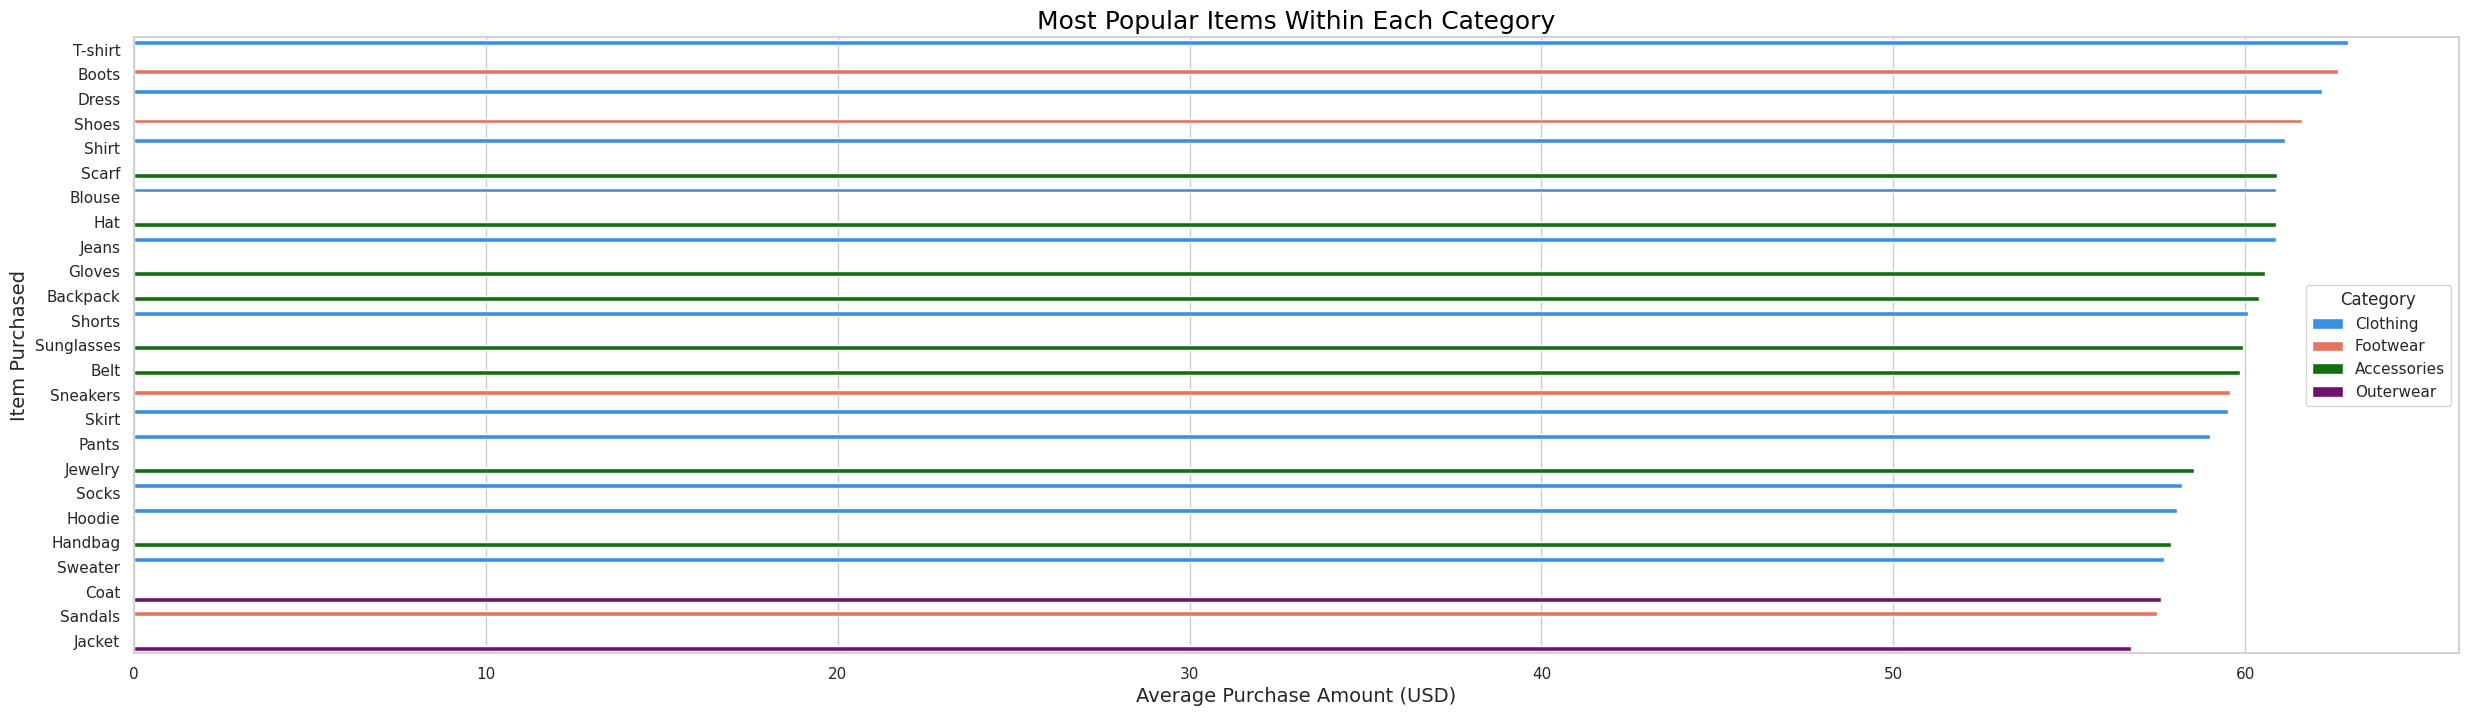

In [ ]:
# Group the data by 'Category' and 'Item Purchased,' then calculate the average 'Purchase Amount (USD)' within each group
grouped_data = df.groupby(['Category', 'Item Purchased'])['Purchase Amount (USD)'].mean().reset_index()

# Sort the data by average purchase amount in descending order to find the most popular items
grouped_data = grouped_data.sort_values(by='Purchase Amount (USD)', ascending=False)

# Create a bar plot
plt.figure(figsize=(30, 8))

# Apply a seaborn theme
sns.set_style("whitegrid")

custom_colors = ['dodgerblue', 'tomato', 'green' , 'purple']
# Use a barplot to show the most popular items within each category
sns.barplot(x='Purchase Amount (USD)', y='Item Purchased', hue='Category', data=grouped_data, palette=custom_colors )

plt.title('Most Popular Items Within Each Category', fontsize=18, color='black')
plt.xlabel('Average Purchase Amount (USD)', fontsize=14)
plt.ylabel('Item Purchased', fontsize=14)

# Customize the legend
plt.legend(title='Category')

plt.show()


Total Purchase Amount of items by Color

In [ ]:
# Group the data by 'Color' and calculate the total purchase amount for each color
color_sales = df.groupby('Color')['Purchase Amount (USD)'].sum().reset_index()

# Sort the data in descending order
color_sales = color_sales.sort_values(by='Purchase Amount (USD)', ascending=True)

plt.figure(figsize=(30, 8))

# Apply a seaborn theme
sns.set_style("whitegrid")

# Create an interactive bar plot using Plotly Express
fig = px.bar(color_sales, x='Purchase Amount (USD)', y='Color',
             labels={'Purchase Amount (USD)': 'Total Purchase Amount (USD)'})

# Hide the color legend
fig.update_traces(marker_color='rgb(102, 179, 255)', showlegend=False)  # Set a custom bar color and hide legend

# Customize hover information
fig.update_layout(hovermode='closest')
fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')

# Set plot title and axis labels
fig.update_layout(title='Item purchased amount Color wise', xaxis_title='Total Purchase Amount (USD)', yaxis_title='Color',title_x=0.5,title_font=dict(size=25),
    title_font_color='black',)

# Show the interactive plot
fig.show()


<Figure size 3000x800 with 0 Axes>


# **Key Findings:**#
*   Female coustomers purchasing amount is higher then the male coustomers.
*   Highest amount of pusrchasing category is 'Clothing' & lowest is 'Outerwear'.
*   Purchasing amount is highest in 'Fall' season & lowest in 'Summer' season.
*   There is a slight decline in the average number of previous purchases for customers who purchase from a company annually.
*   Discount & promotional code applied purchasing amount is less than the number of non promotional code applied purcchangng amount
*   Most commonly used payment methodd is 'PayPal' & least time used payment method is 'Bank Transfer'
*   Most Popular Items Within Each Category:
        Clothing: T-shirt
        Foot wear: Boots
        Accessories: Scarf
        Outer wear: Coat
*   Green color's items are the most purchased product.




